<a href="https://colab.research.google.com/github/forestser/Pyhton/blob/main/02_pandas_basic_%ED%95%B4%EA%B2%B0%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **해결문제**


RFID기반 음식물쓰레기 종량제 시스템을 채택한 지자체의  2017년7월~2020년7월까지의 지자체별 RFID음식물쓰레기 배출량를 분석하시오.

+ 광역시도별 음식물 쓰레기 배출량
+ 광역시도별 자료건수
+ 부산광역시 지지체별 음식물 쓰레기 배출량
+ 해운대구 월별 음식물 쓰레기 배출량


---

In [2]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

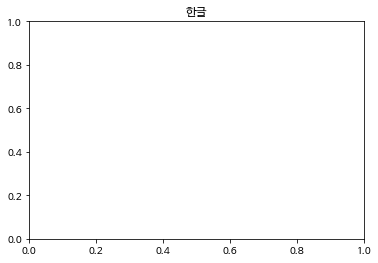

In [2]:
plt.title('한글')
plt.show()

## 1. 데이터불러오기



In [4]:
#pandas 라이브러리 추가
import pandas as pd

In [9]:
#데이터불러오기
df = pd.read_csv('/content/drive/MyDrive/BSSM2022/BSSM2022/data/지자체별 RFID음식물쓰레기 배출량.csv', engine='python', encoding='cp949')
df.head()

,배출연도,배출월,광역시도,기초지자체,배출량(톤)
0,2017,7,서울특별시,종로구,87260
1,2017,7,서울특별시,중구,189784
2,2017,7,서울특별시,용산구,6679
3,2017,7,서울특별시,성동구,296140
4,2017,7,서울특별시,광진구,166759


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
[item for item in df if item == '부산광역시']

[]

In [10]:
#열명변경 : 배출연도->연도, 배출월->월, 배출량(톤)->배출량
df.columns = ['연도', '월', '광역시도', '기초지자체', '배출량']

## 2. 광역시도별 배출량

In [5]:
import seaborn as sns

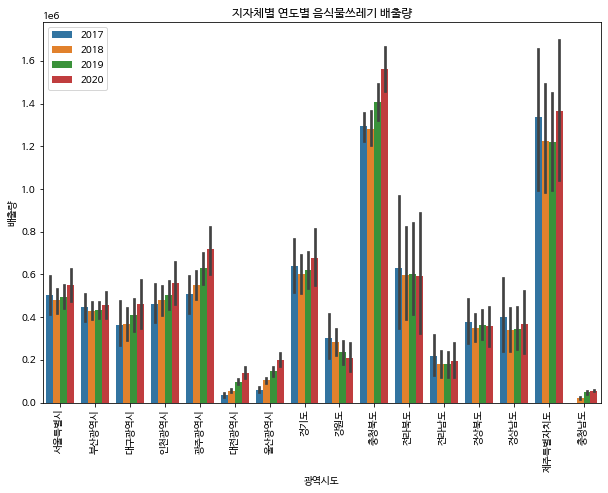

In [28]:
plt.figure(figsize=(10,7))
plt.title('지자체별 연도별 음식물쓰레기 배출량')
sns.barplot(x='광역시도',y='배출량',hue='연도',data = df)
plt.xticks(rotation=90)
plt.legend()
plt.show()

## 3.광역시도별 자료 건수

No handles with labels found to put in legend.


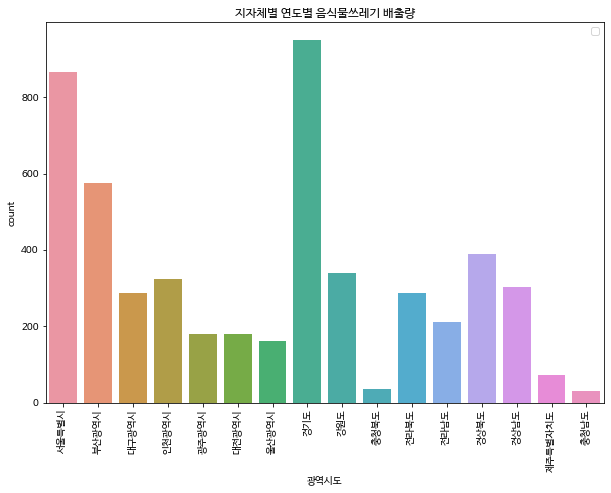

In [33]:
plt.figure(figsize=(10,7))
plt.title('지자체별 연도별 음식물쓰레기 배출량')
sns.countplot(x='광역시도',data = df)
plt.xticks(rotation=90)
plt.legend()
plt.show()

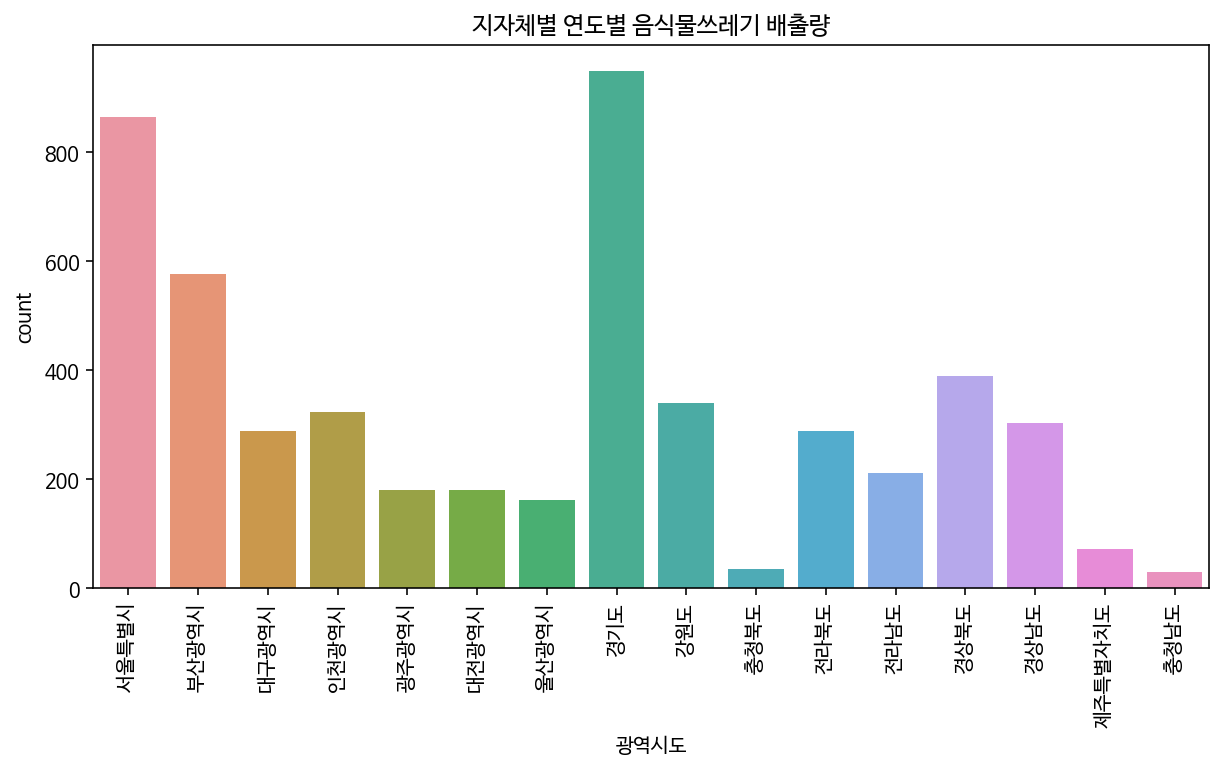

## 4.부산광역시 지자체별 음식물 쓰레기 배출량

In [11]:
df1 = df[df['광역시도']=='부산광역시']

,연도,월,광역시도,기초지자체,배출량
22,2017,7,부산광역시,중구,9596
23,2017,7,부산광역시,서구,97104
24,2017,7,부산광역시,동구,59401
25,2017,7,부산광역시,영도구,187073
26,2017,7,부산광역시,부산진구,708005
...,...,...,...,...,...
5078,2020,7,부산광역시,강서구,428097
5079,2020,7,부산광역시,연제구,474435
5080,2020,7,부산광역시,수영구,335382
5081,2020,7,부산광역시,사상구,626469


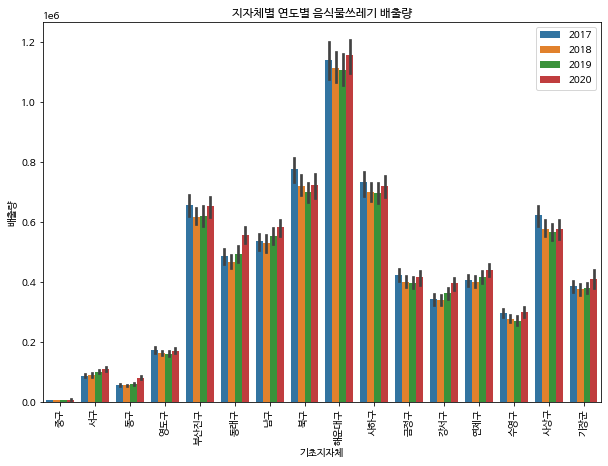

In [12]:
plt.figure(figsize=(10,7))
plt.title('지자체별 연도별 음식물쓰레기 배출량')
sns.barplot(x='기초지자체',y='배출량',hue='연도',data = df1)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [14]:
df2 = df[df['기초지자체']=='해운대구']

No handles with labels found to put in legend.


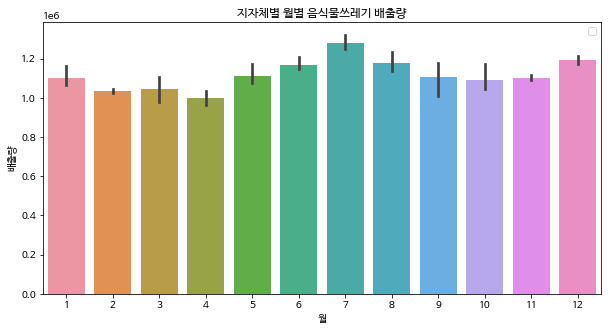

In [15]:
plt.figure(figsize=(10,5))
plt.title('지자체별 월별 음식물쓰레기 배출량')
sns.barplot(x='월',y='배출량',data = df2)
plt.legend()
plt.show()

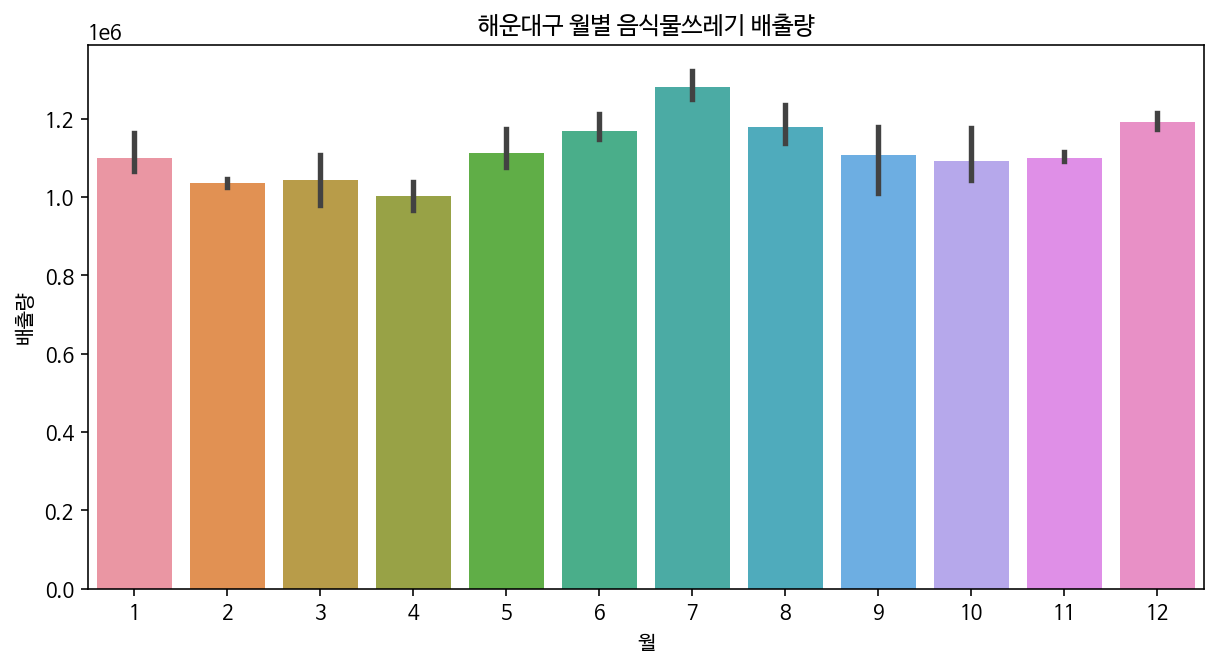